#PROJECT: WEDNESDAY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, glob

DATA_DIR = "/content/drive/MyDrive/TrenPH_NYC_Wednesdays"

csv_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))
len(csv_files), csv_files[:5]

(30,
 ['/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-08_stop_times.csv',
  '/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-08_trips.csv',
  '/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-15_stop_times.csv',
  '/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-15_trips.csv',
  '/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-22_stop_times.csv'])

In [ ]:
stop_times_files = sorted([f for f in csv_files if "stop_times" in os.path.basename(f)])
trips_files      = sorted([f for f in csv_files if "trips" in os.path.basename(f)])

len(stop_times_files), len(trips_files), stop_times_files[0], trips_files[0]

(15,
 15,
 '/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-08_stop_times.csv',
 '/content/drive/MyDrive/TrenPH_NYC_Wednesdays/subwaydatanyc_2025-01-08_trips.csv')

##Data Inspection and Cleaning

In [ ]:
import re

def extract_date(filepath: str) -> str:
    # matches YYYY-MM-DD inside filename
    m = re.search(r"\d{4}-\d{2}-\d{2}", os.path.basename(filepath))
    return m.group(0) if m else "UNKNOWN"

stop_times_by_date = {extract_date(f): f for f in stop_times_files}
trips_by_date      = {extract_date(f): f for f in trips_files}

# quick check:
sorted(stop_times_by_date.keys())[:15], sorted(trips_by_date.keys())[:15]

(['2025-01-08',
  '2025-01-15',
  '2025-01-22',
  '2025-01-29',
  '2025-02-05',
  '2025-02-12',
  '2025-02-19',
  '2025-02-26',
  '2025-03-05',
  '2025-03-12',
  '2025-03-19',
  '2025-03-26',
  '2025-04-02',
  '2025-04-09',
  '2025-04-16'],
 ['2025-01-08',
  '2025-01-15',
  '2025-01-22',
  '2025-01-29',
  '2025-02-05',
  '2025-02-12',
  '2025-02-19',
  '2025-02-26',
  '2025-03-05',
  '2025-03-12',
  '2025-03-19',
  '2025-03-26',
  '2025-04-02',
  '2025-04-09',
  '2025-04-16'])

In [ ]:
import pandas as pd

sample_date = "2025-02-12"
st_path = stop_times_by_date[sample_date]
tr_path = trips_by_date[sample_date]

stop_times_df = pd.read_csv(st_path)
trips_df = pd.read_csv(tr_path)

stop_times_df.shape, trips_df.shape

((231287, 7), (8409, 11))

In [ ]:
print("Total CSV files found:", len(csv_files))
print("\nFirst 10 files:")
for f in csv_files[:10]:
    print(" -", os.path.basename(f))

Total CSV files found: 30

First 10 files:
 - subwaydatanyc_2025-01-08_stop_times.csv
 - subwaydatanyc_2025-01-08_trips.csv
 - subwaydatanyc_2025-01-15_stop_times.csv
 - subwaydatanyc_2025-01-15_trips.csv
 - subwaydatanyc_2025-01-22_stop_times.csv
 - subwaydatanyc_2025-01-22_trips.csv
 - subwaydatanyc_2025-01-29_stop_times.csv
 - subwaydatanyc_2025-01-29_trips.csv
 - subwaydatanyc_2025-02-05_stop_times.csv
 - subwaydatanyc_2025-02-05_trips.csv


In [ ]:
stop_times_files = sorted([f for f in csv_files if "stop_times" in os.path.basename(f)])
trips_files      = sorted([f for f in csv_files if "trips" in os.path.basename(f)])

print("stop_times files:", len(stop_times_files))
print("trips files:", len(trips_files))

print("\nExample stop_times:", os.path.basename(stop_times_files[0]))
print("Example trips:", os.path.basename(trips_files[0]))

stop_times files: 15
trips files: 15

Example stop_times: subwaydatanyc_2025-01-08_stop_times.csv
Example trips: subwaydatanyc_2025-01-08_trips.csv


In [ ]:
import os, re
from pathlib import Path

def extract_date(fname: str) -> str:
    m = re.search(r"\d{4}-\d{2}-\d{2}", fname)
    return m.group(0) if m else None

stop_times_by_date = {}
trips_by_date = {}

for f in stop_times_files:
    d = extract_date(os.path.basename(f))
    if d: stop_times_by_date[d] = f

for f in trips_files:
    d = extract_date(os.path.basename(f))
    if d: trips_by_date[d] = f

dates_stop = sorted(stop_times_by_date.keys())
dates_trips = sorted(trips_by_date.keys())

print("Dates in stop_times:", len(dates_stop))
print("Dates in trips:", len(dates_trips))
print("First 5 dates:", dates_stop[:5])
print("Last 5 dates:", dates_stop[-5:])
print("Stop vs Trips same dates?", dates_stop == dates_trips)

Dates in stop_times: 15
Dates in trips: 15
First 5 dates: ['2025-01-08', '2025-01-15', '2025-01-22', '2025-01-29', '2025-02-05']
Last 5 dates: ['2025-03-19', '2025-03-26', '2025-04-02', '2025-04-09', '2025-04-16']
Stop vs Trips same dates? True


In [ ]:
special_event_flag = {
    "2025-01-08": 0,
    "2025-01-15": 0,
    "2025-01-22": 0,
    "2025-01-29": 0,
    "2025-02-05": 0,
    "2025-02-12": 1,  # Lincoln’s Bday
    "2025-02-19": 1,  # Presidents’ Week
    "2025-02-26": 0,
    "2025-03-05": 0,
    "2025-03-12": 0,
    "2025-03-19": 1,  # near St Patrick’s
    "2025-03-26": 0,
    "2025-04-02": 0,
    "2025-04-09": 0,
    "2025-04-16": 0,
}

# sanity check: all dataset dates are covered
missing = [d for d in dates_stop if d not in special_event_flag]
extra   = [d for d in special_event_flag.keys() if d not in dates_stop]

print("Missing flags for these dataset dates:", missing)
print("Extra dates in flag map (not in dataset):", extra)

Missing flags for these dataset dates: []
Extra dates in flag map (not in dataset): []


In [ ]:
import pandas as pd

test_date = "2025-02-12"  # special event day
st = pd.read_csv(stop_times_by_date[test_date])

st["service_date"] = test_date
st["Special_Event_Flag"] = special_event_flag[test_date]

print("Loaded:", test_date, "shape:", st.shape)
st.head(3)

Loaded: 2025-02-12 shape: (231287, 9)


,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag
0,1739336400_GS.N01R,901N,4,NaN,1.739354e+09,1739354414,1.739354e+09,2025-02-12,1
1,1739336400_GS.N01R,902N,4,1.739354e+09,NaN,1739354495,1.739354e+09,2025-02-12,1
2,1739336460_4..N,631N,3,1.739357e+09,1.739357e+09,1739357147,1.739357e+09,2025-02-12,1


In [ ]:
import pandas as pd

all_stop_times = []

for d in dates_stop:  # already sorted
    path = stop_times_by_date[d]
    df = pd.read_csv(path)

    df["service_date"] = d
    df["Special_Event_Flag"] = special_event_flag[d]

    all_stop_times.append(df)

stop_times_all = pd.concat(all_stop_times, ignore_index=True)

print("Merged stop_times_all shape:", stop_times_all.shape)
print("Unique service_date:", stop_times_all["service_date"].nunique())
stop_times_all.head(3)

Merged stop_times_all shape: (3375268, 9)
Unique service_date: 15


,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag
0,1736312400_GS.N01R,901N,1,NaN,1.736330e+09,1736330398,1.736330e+09,2025-01-08,0
1,1736312400_GS.N01R,902N,1,1.736330e+09,NaN,1736330458,1.736330e+09,2025-01-08,0
2,1736312490_3..S01R,301S,1,NaN,1.736330e+09,1736330578,1.736331e+09,2025-01-08,0


In [ ]:
print("arrival_time missing %:",
      stop_times_all["arrival_time"].isna().mean() * 100)

print("departure_time missing %:",
      stop_times_all["departure_time"].isna().mean() * 100)

arrival_time missing %: 1.6266856439251638
departure_time missing %: 1.7720074376316193


In [ ]:
PAIR_STOP_IDS = ["418S", "419S", "419N", "418N"]

stop_times_pair = stop_times_all[stop_times_all["stop_id"].isin(PAIR_STOP_IDS)].copy()

print("stop_times_pair shape:", stop_times_pair.shape)
print(stop_times_pair["stop_id"].value_counts())
stop_times_pair.head(3)

stop_times_pair shape: (18386, 9)
stop_id
419S    4711
418S    4707
418N    4490
419N    4478
Name: count, dtype: int64


,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag
62,1736312700_4..N01R,419N,3,1.736333e+09,1.736333e+09,1736332663,1.736333e+09,2025-01-08,0
63,1736312700_4..N01R,418N,3,1.736333e+09,1.736333e+09,1736332738,1.736333e+09,2025-01-08,0
225,1736312760_4..S05R,418S,2,1.736333e+09,1.736333e+09,1736333341,1.736333e+09,2025-01-08,0


In [ ]:
VALID_PAIRS = {("418S", "419S"), ("419N", "418N")}

df = stop_times_pair.copy()
df.shape

(18386, 9)

In [ ]:
df["event_time"] = df["departure_time"].fillna(df["arrival_time"])
df = df.dropna(subset=["event_time"]).copy()

# Ensure it's numeric (sometimes pandas reads scientific notation as float)
df["event_time"] = pd.to_numeric(df["event_time"], errors="coerce")
df = df.dropna(subset=["event_time"]).copy()

print("After event_time cleanup:", df.shape)

After event_time cleanup: (18386, 10)


In [ ]:
df = df.sort_values(["service_date", "trip_uid", "event_time"]).copy()
df.head(5)

,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag,event_time
62,1736312700_4..N01R,419N,3,1.736333e+09,1.736333e+09,1736332663,1.736333e+09,2025-01-08,0,1.736333e+09
63,1736312700_4..N01R,418N,3,1.736333e+09,1.736333e+09,1736332738,1.736333e+09,2025-01-08,0,1.736333e+09
225,1736312760_4..S05R,418S,2,1.736333e+09,1.736333e+09,1736333341,1.736333e+09,2025-01-08,0,1.736333e+09
226,1736312760_4..S05R,419S,2,1.736333e+09,1.736333e+09,1736333401,1.736333e+09,2025-01-08,0,1.736333e+09
409,1736313120_5..S03R,418S,2,1.736334e+09,1.736334e+09,1736334058,1.736334e+09,2025-01-08,0,1.736334e+09


In [ ]:
df["event_time"] = df["departure_time"].fillna(df["arrival_time"])
df = df.dropna(subset=["event_time"]).copy()

df["event_time"] = pd.to_numeric(df["event_time"], errors="coerce")
df = df.dropna(subset=["event_time"]).copy()

print("After event_time cleanup:", df.shape)

After event_time cleanup: (18386, 10)


In [ ]:
df = df.sort_values(["service_date", "trip_uid", "event_time"]).copy()
df.head(5)

,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag,event_time
62,1736312700_4..N01R,419N,3,1.736333e+09,1.736333e+09,1736332663,1.736333e+09,2025-01-08,0,1.736333e+09
63,1736312700_4..N01R,418N,3,1.736333e+09,1.736333e+09,1736332738,1.736333e+09,2025-01-08,0,1.736333e+09
225,1736312760_4..S05R,418S,2,1.736333e+09,1.736333e+09,1736333341,1.736333e+09,2025-01-08,0,1.736333e+09
226,1736312760_4..S05R,419S,2,1.736333e+09,1.736333e+09,1736333401,1.736333e+09,2025-01-08,0,1.736333e+09
409,1736313120_5..S03R,418S,2,1.736334e+09,1.736334e+09,1736334058,1.736334e+09,2025-01-08,0,1.736334e+09


In [ ]:
# "Next" stop within same trip on same day
df["next_stop_id"]   = df.groupby(["service_date", "trip_uid"])["stop_id"].shift(-1)
df["next_event_time"] = df.groupby(["service_date", "trip_uid"])["event_time"].shift(-1)

pairs = df.dropna(subset=["next_stop_id", "next_event_time"]).copy()

pairs["from_stop"] = pairs["stop_id"]
pairs["to_stop"]   = pairs["next_stop_id"]

# Keep only the direction-correct neighbor pairs
pairs = pairs[pairs.apply(lambda r: (r["from_stop"], r["to_stop"]) in VALID_PAIRS, axis=1)].copy()

# Travel time in seconds
pairs["travel_time_sec"] = pairs["next_event_time"] - pairs["event_time"]

# Relevant columns
neighbor_travel = pairs[[
    "service_date",
    "Special_Event_Flag",
    "trip_uid",
    "from_stop",
    "to_stop",
    "track",
    "event_time",
    "next_event_time",
    "travel_time_sec"
]].copy()

print("neighbor_travel shape:", neighbor_travel.shape)
neighbor_travel.head(10)

neighbor_travel shape: (9176, 9)


,service_date,Special_Event_Flag,trip_uid,from_stop,to_stop,track,event_time,next_event_time,travel_time_sec
62,2025-01-08,0,1736312700_4..N01R,419N,418N,3,1.736333e+09,1.736333e+09,70.0
225,2025-01-08,0,1736312760_4..S05R,418S,419S,2,1.736333e+09,1.736333e+09,69.0
409,2025-01-08,0,1736313120_5..S03R,418S,419S,2,1.736334e+09,1.736334e+09,74.0
440,2025-01-08,0,1736313150_5..S02R,418S,419S,2,1.736334e+09,1.736334e+09,68.0
523,2025-01-08,0,1736313240_4..S06R,418S,419S,2,1.736334e+09,1.736334e+09,77.0
821,2025-01-08,0,1736313720_4..S06R,418S,419S,2,1.736334e+09,1.736334e+09,73.0
881,2025-01-08,0,1736313840_5..S03R,418S,419S,2,1.736335e+09,1.736335e+09,80.0
951,2025-01-08,0,1736313900_4..N01R,419N,418N,3,1.736334e+09,1.736334e+09,73.0
1100,2025-01-08,0,1736314170_4..S37R,418S,419S,2,1.736335e+09,1.736335e+09,78.0
1232,2025-01-08,0,1736314320_5..S03R,418S,419S,2,1.736335e+09,1.736336e+09,85.0


In [ ]:
before = len(neighbor_travel)

neighbor_travel = neighbor_travel[
    (neighbor_travel["travel_time_sec"] > 0) &
    (neighbor_travel["travel_time_sec"] <= 1800)
].copy()

after = len(neighbor_travel)
print(f"Filtered {before-after} rows; kept {after} rows.")

Filtered 0 rows; kept 9176 rows.


In [ ]:
summary = neighbor_travel.groupby(["from_stop", "to_stop"])["travel_time_sec"].describe()
print(summary)

print("\nCounts per pair:")
print(neighbor_travel.groupby(["from_stop", "to_stop"]).size())

                    count       mean        std  min   25%   50%   75%    max
from_stop to_stop                                                            
418S      419S     4702.0  89.425989  25.885935  2.0  78.0  85.0  92.0  569.0
419N      418N     4474.0  81.742065  22.890355  8.0  71.0  77.0  88.0  523.0

Counts per pair:
from_stop  to_stop
418S       419S       4702
419N       418N       4474
dtype: int64


In [ ]:
df2 = stop_times_pair.copy()

# Define from-time: prefer departure (train leaving station)
df2["from_time"] = df2["departure_time"].fillna(df2["arrival_time"])

# Define to-time: prefer arrival (train reaching next station)
df2["to_time"] = df2["arrival_time"].fillna(df2["departure_time"])

# Convert to numeric safely
df2["from_time"] = pd.to_numeric(df2["from_time"], errors="coerce")
df2["to_time"]   = pd.to_numeric(df2["to_time"], errors="coerce")

df2 = df2.dropna(subset=["from_time", "to_time"]).copy()

df2 = df2.sort_values(["service_date", "trip_uid", "from_time"]).copy()
print("df2 shape:", df2.shape)

df2 shape: (18386, 11)


In [ ]:
df2["next_stop_id"] = df2.groupby(["service_date", "trip_uid"])["stop_id"].shift(-1)
df2["next_to_time"] = df2.groupby(["service_date", "trip_uid"])["to_time"].shift(-1)

pairs2 = df2.dropna(subset=["next_stop_id", "next_to_time"]).copy()

pairs2["from_stop"] = pairs2["stop_id"]
pairs2["to_stop"]   = pairs2["next_stop_id"]

pairs2 = pairs2[pairs2.apply(lambda r: (r["from_stop"], r["to_stop"]) in VALID_PAIRS, axis=1)].copy()

pairs2["travel_time_sec"] = pairs2["next_to_time"] - pairs2["from_time"]

arrival_pred = pairs2[[
    "service_date",
    "Special_Event_Flag",
    "trip_uid",
    "from_stop",
    "to_stop",
    "track",
    "from_time",
    "next_to_time",
    "travel_time_sec"
]].copy()

arrival_pred = arrival_pred.rename(columns={
    "from_time": "from_depart_time",
    "next_to_time": "to_arrival_time"
})

print("arrival_pred shape:", arrival_pred.shape)
arrival_pred.head(10)

arrival_pred shape: (9176, 9)


,service_date,Special_Event_Flag,trip_uid,from_stop,to_stop,track,from_depart_time,to_arrival_time,travel_time_sec
62,2025-01-08,0,1736312700_4..N01R,419N,418N,3,1.736333e+09,1.736333e+09,70.0
225,2025-01-08,0,1736312760_4..S05R,418S,419S,2,1.736333e+09,1.736333e+09,69.0
409,2025-01-08,0,1736313120_5..S03R,418S,419S,2,1.736334e+09,1.736334e+09,74.0
440,2025-01-08,0,1736313150_5..S02R,418S,419S,2,1.736334e+09,1.736334e+09,68.0
523,2025-01-08,0,1736313240_4..S06R,418S,419S,2,1.736334e+09,1.736334e+09,77.0
821,2025-01-08,0,1736313720_4..S06R,418S,419S,2,1.736334e+09,1.736334e+09,73.0
881,2025-01-08,0,1736313840_5..S03R,418S,419S,2,1.736335e+09,1.736335e+09,80.0
951,2025-01-08,0,1736313900_4..N01R,419N,418N,3,1.736334e+09,1.736334e+09,73.0
1100,2025-01-08,0,1736314170_4..S37R,418S,419S,2,1.736335e+09,1.736335e+09,78.0
1232,2025-01-08,0,1736314320_5..S03R,418S,419S,2,1.736335e+09,1.736336e+09,85.0


In [ ]:
before = len(arrival_pred)

arrival_pred = arrival_pred[
    (arrival_pred["travel_time_sec"] > 0) &
    (arrival_pred["travel_time_sec"] <= 1800)
].copy()

after = len(arrival_pred)

print(f"Removed {before-after} rows; kept {after} rows.")

Removed 0 rows; kept 9176 rows.


In [ ]:
arrival_pred["from_depart_dt"] = pd.to_datetime(arrival_pred["from_depart_time"], unit="s")
arrival_pred["to_arrival_dt"]  = pd.to_datetime(arrival_pred["to_arrival_time"], unit="s")

arrival_pred[[
    "service_date",
    "from_stop",
    "to_stop",
    "from_depart_dt",
    "to_arrival_dt",
    "travel_time_sec",
    "Special_Event_Flag"
]].head(10)

,service_date,from_stop,to_stop,from_depart_dt,to_arrival_dt,travel_time_sec,Special_Event_Flag
62,2025-01-08,419N,418N,2025-01-08 10:37:27,2025-01-08 10:38:37,70.0,0
225,2025-01-08,418S,419S,2025-01-08 10:48:40,2025-01-08 10:49:49,69.0,0
409,2025-01-08,418S,419S,2025-01-08 11:00:33,2025-01-08 11:01:47,74.0,0
440,2025-01-08,418S,419S,2025-01-08 10:51:49,2025-01-08 10:52:57,68.0,0
523,2025-01-08,418S,419S,2025-01-08 10:56:47,2025-01-08 10:58:04,77.0,0
821,2025-01-08,418S,419S,2025-01-08 11:05:55,2025-01-08 11:07:08,73.0,0
881,2025-01-08,418S,419S,2025-01-08 11:15:46,2025-01-08 11:17:06,80.0,0
951,2025-01-08,419N,418N,2025-01-08 10:58:51,2025-01-08 11:00:04,73.0,0
1100,2025-01-08,418S,419S,2025-01-08 11:14:06,2025-01-08 11:15:24,78.0,0
1232,2025-01-08,418S,419S,2025-01-08 11:24:41,2025-01-08 11:26:06,85.0,0


In [ ]:
print(arrival_pred.groupby(["from_stop", "to_stop"])["travel_time_sec"].describe())
print("\nCounts:")
print(arrival_pred.groupby(["from_stop", "to_stop"]).size())

                    count       mean        std  min   25%   50%   75%    max
from_stop to_stop                                                            
418S      419S     4702.0  89.425989  25.885935  2.0  78.0  85.0  92.0  569.0
419N      418N     4474.0  81.742065  22.890355  8.0  71.0  77.0  88.0  523.0

Counts:
from_stop  to_stop
418S       419S       4702
419N       418N       4474
dtype: int64


##Preliminary EDA

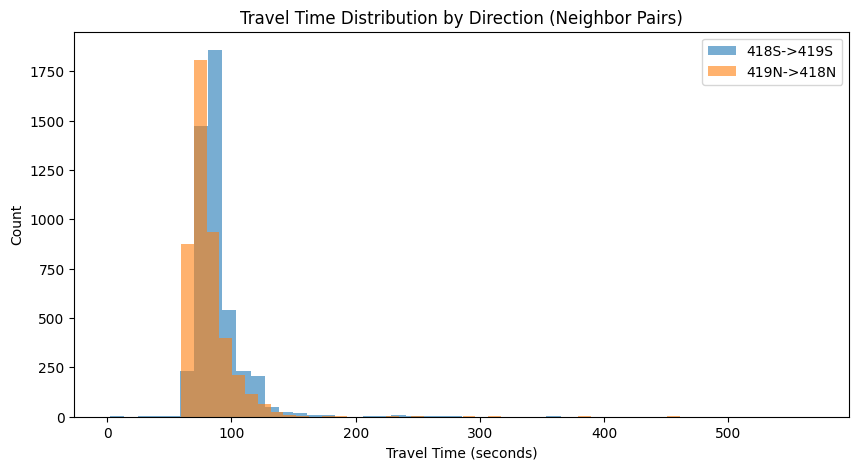

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for (fs, ts), group in arrival_pred.groupby(["from_stop", "to_stop"]):
    plt.hist(group["travel_time_sec"], bins=50, alpha=0.6, label=f"{fs}->{ts}")

plt.xlabel("Travel Time (seconds)")
plt.ylabel("Count")
plt.title("Travel Time Distribution by Direction (Neighbor Pairs)")
plt.legend()
plt.show()

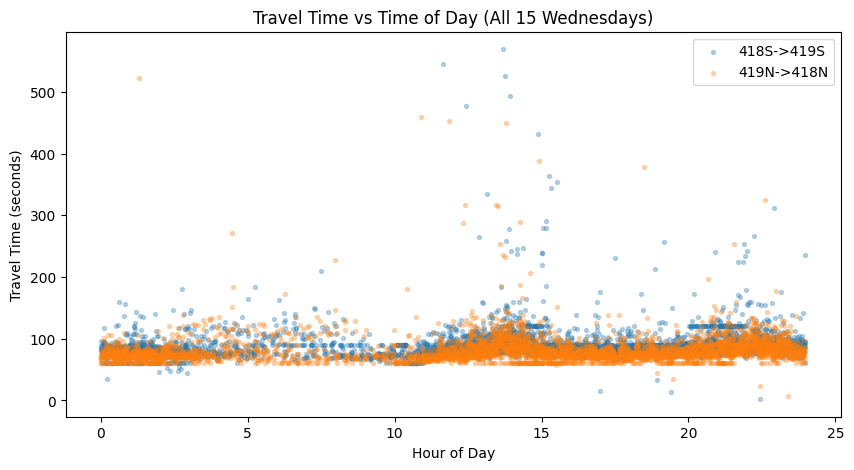

In [ ]:
tmp = arrival_pred.copy()
tmp["from_depart_dt"] = pd.to_datetime(tmp["from_depart_time"], unit="s")
tmp["hour"] = tmp["from_depart_dt"].dt.hour + tmp["from_depart_dt"].dt.minute/60

plt.figure(figsize=(10,5))

for (fs, ts), group in tmp.groupby(["from_stop", "to_stop"]):
    plt.scatter(group["hour"], group["travel_time_sec"], s=8, alpha=0.3, label=f"{fs}->{ts}")

plt.xlabel("Hour of Day")
plt.ylabel("Travel Time (seconds)")
plt.title("Travel Time vs Time of Day (All 15 Wednesdays)")
plt.legend()
plt.show()

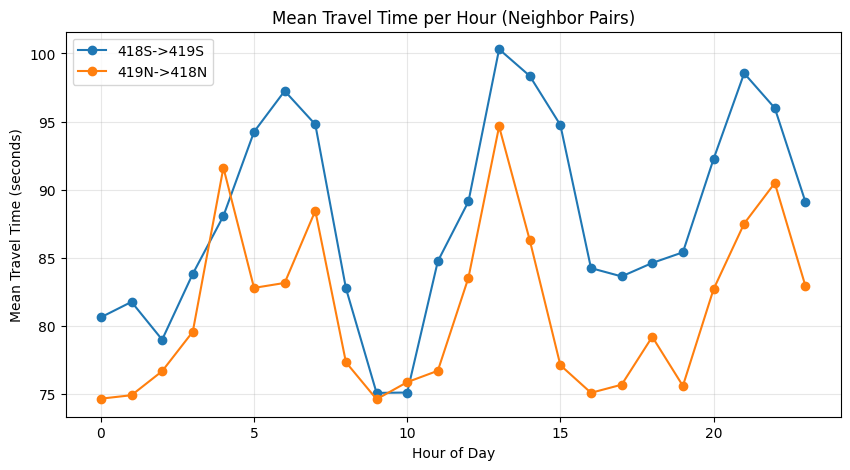

In [ ]:
tmp["hour_int"] = tmp["from_depart_dt"].dt.hour

hourly = tmp.groupby(["hour_int", "from_stop", "to_stop"])["travel_time_sec"].mean().reset_index()

plt.figure(figsize=(10,5))

for (fs, ts), group in hourly.groupby(["from_stop", "to_stop"]):
    plt.plot(group["hour_int"], group["travel_time_sec"], marker="o", label=f"{fs}->{ts}")

plt.xlabel("Hour of Day")
plt.ylabel("Mean Travel Time (seconds)")
plt.title("Mean Travel Time per Hour (Neighbor Pairs)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-3692729202.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([normal, event], labels=["Normal Days (0)", "Special Event Days (1)"])


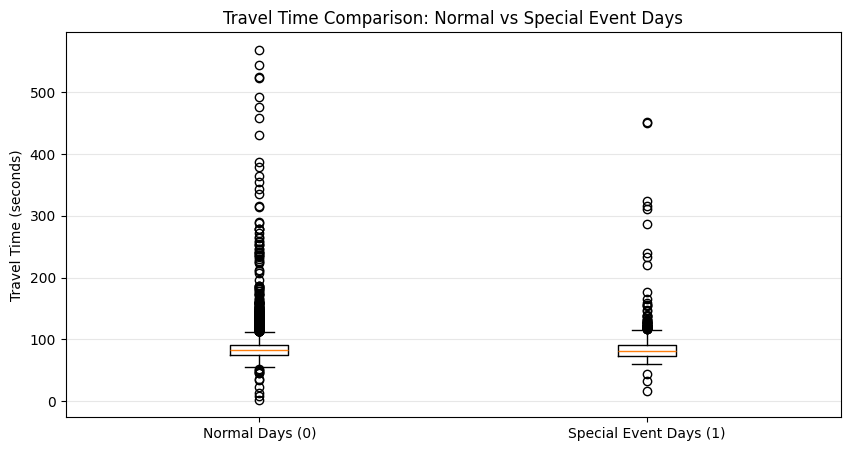

In [ ]:
plt.figure(figsize=(10,5))

normal = arrival_pred[arrival_pred["Special_Event_Flag"] == 0]["travel_time_sec"]
event  = arrival_pred[arrival_pred["Special_Event_Flag"] == 1]["travel_time_sec"]

plt.boxplot([normal, event], labels=["Normal Days (0)", "Special Event Days (1)"])
plt.ylabel("Travel Time (seconds)")
plt.title("Travel Time Comparison: Normal vs Special Event Days")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

##Feature Engineering + Training for Model A
###Station+Neighbor (418S→419S, 419N→418N)

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import numpy as np

ml_df = arrival_pred.copy()

# Convert timestamp to datetime
ml_df["from_depart_dt"] = pd.to_datetime(ml_df["from_depart_time"], unit="s")

# Time features
ml_df["hour"] = ml_df["from_depart_dt"].dt.hour
ml_df["minute"] = ml_df["from_depart_dt"].dt.minute
ml_df["time_minutes"] = ml_df["hour"] * 60 + ml_df["minute"]

# Direction: S=0, N=1
ml_df["direction"] = np.where(ml_df["from_stop"].str.endswith("S"), 0, 1)

# Sort for lag features
ml_df = ml_df.sort_values(["service_date", "direction", "from_depart_time"]).copy()

# Lag travel time
ml_df["prev_travel_time_sec"] = ml_df.groupby(["service_date", "direction"])["travel_time_sec"].shift(1)

# Headway
ml_df["prev_depart_time"] = ml_df.groupby(["service_date", "direction"])["from_depart_time"].shift(1)
ml_df["headway_sec"] = ml_df["from_depart_time"] - ml_df["prev_depart_time"]

# Drop NaNs from lag/headway
before = len(ml_df)
ml_df = ml_df.dropna(subset=["prev_travel_time_sec", "headway_sec"]).copy()
after = len(ml_df)

print("Rows removed (no prev train):", before-after)
print("Final ML rows:", after)

ml_df.head(3)

Rows removed (no prev train): 30
Final ML rows: 9146


,service_date,Special_Event_Flag,trip_uid,from_stop,to_stop,track,from_depart_time,to_arrival_time,travel_time_sec,from_depart_dt,to_arrival_dt,hour,minute,time_minutes,direction,prev_travel_time_sec,prev_depart_time,headway_sec
86630,2025-01-08,0,1736378880_4..S01X010,418S,419S,2,1.736313e+09,1.736313e+09,79.0,2025-01-08 05:11:35,2025-01-08 05:12:54,5,11,311,0,69.0,1.736312e+09,784.0
86946,2025-01-08,0,1736379390_4..S01X010,418S,419S,2,1.736314e+09,1.736314e+09,90.0,2025-01-08 05:25:03,2025-01-08 05:26:33,5,25,325,0,79.0,1.736313e+09,808.0
87285,2025-01-08,0,1736379930_4..S01X010,418S,419S,2,1.736315e+09,1.736315e+09,90.0,2025-01-08 05:49:48,2025-01-08 05:51:18,5,49,349,0,90.0,1.736314e+09,1485.0


In [ ]:
all_dates = sorted(ml_df["service_date"].unique())

train_dates = all_dates[:12]
test_dates  = all_dates[12:]

train_df = ml_df[ml_df["service_date"].isin(train_dates)].copy()
test_df  = ml_df[ml_df["service_date"].isin(test_dates)].copy()

print("Train dates:", train_dates)
print("Test dates:", test_dates)
print("Train rows:", train_df.shape)
print("Test rows:", test_df.shape)

Train dates: ['2025-01-08', '2025-01-15', '2025-01-22', '2025-01-29', '2025-02-05', '2025-02-12', '2025-02-19', '2025-02-26', '2025-03-05', '2025-03-12', '2025-03-19', '2025-03-26']
Test dates: ['2025-04-02', '2025-04-09', '2025-04-16']
Train rows: (7192, 18)
Test rows: (1954, 18)


In [ ]:
ml_df = ml_df.sort_values(["service_date", "direction", "from_depart_time"]).copy()

ml_df["prev_travel_time_sec"] = ml_df.groupby(["service_date", "direction"])["travel_time_sec"].shift(1)

ml_df[["service_date", "direction", "travel_time_sec", "prev_travel_time_sec"]].head(10)

,service_date,direction,travel_time_sec,prev_travel_time_sec
86630,2025-01-08,0,79.0,NaN
86946,2025-01-08,0,90.0,79.0
87285,2025-01-08,0,90.0,90.0
225,2025-01-08,0,69.0,90.0
440,2025-01-08,0,68.0,69.0
523,2025-01-08,0,77.0,68.0
409,2025-01-08,0,74.0,77.0
821,2025-01-08,0,73.0,74.0
1100,2025-01-08,0,78.0,73.0
881,2025-01-08,0,80.0,78.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train = train_df["travel_time_sec"]
y_test = test_df["travel_time_sec"]

median_pred = np.full(len(y_test), y_train.median())

mae_base = mean_absolute_error(y_test, median_pred)
rmse_base = np.sqrt(mean_squared_error(y_test, median_pred))

print("Median baseline MAE:", mae_base)
print("Median baseline RMSE:", rmse_base)

Median baseline MAE: 13.237461617195496
Median baseline RMSE: 24.896983247391244


In [ ]:
from sklearn.linear_model import LinearRegression

FEATURES = [
    "time_minutes",
    "direction",
    "Special_Event_Flag",
    "prev_travel_time_sec",
    "headway_sec"
]

X_train = train_df[FEATURES]
X_test  = test_df[FEATURES]

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression MAE: 12.084038076065994
Linear Regression RMSE: 23.00035774698714


In [ ]:
all_dates = sorted(ml_df["service_date"].unique())

train_dates = all_dates[:12]
test_dates  = all_dates[12:]

train_df = ml_df[ml_df["service_date"].isin(train_dates)].copy()
test_df  = ml_df[ml_df["service_date"].isin(test_dates)].copy()

print("Train dates:", train_dates)
print("Test dates:", test_dates)
print("Train rows:", train_df.shape)
print("Test rows:", test_df.shape)

Train dates: ['2025-01-08', '2025-01-15', '2025-01-22', '2025-01-29', '2025-02-05', '2025-02-12', '2025-02-19', '2025-02-26', '2025-03-05', '2025-03-12', '2025-03-19', '2025-03-26']
Test dates: ['2025-04-02', '2025-04-09', '2025-04-16']
Train rows: (7192, 18)
Test rows: (1954, 18)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=12
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest MAE: 11.218736041239008
Random Forest RMSE: 22.735811232703146


In [ ]:
test_pred = test_df.copy()

# Predict travel time
test_pred["pred_travel_time_sec"] = rf.predict(test_pred[FEATURES])

# Predicted arrival time (unix)
test_pred["pred_to_arrival_time"] = test_pred["from_depart_time"] + test_pred["pred_travel_time_sec"]

# Convert to datetime (readable)
test_pred["from_depart_dt"] = pd.to_datetime(test_pred["from_depart_time"], unit="s")
test_pred["true_arrival_dt"] = pd.to_datetime(test_pred["to_arrival_time"], unit="s")
test_pred["pred_arrival_dt"] = pd.to_datetime(test_pred["pred_to_arrival_time"], unit="s")

test_pred[[
    "service_date", "from_stop", "to_stop",
    "from_depart_dt", "true_arrival_dt", "pred_arrival_dt",
    "travel_time_sec", "pred_travel_time_sec"
]].head(10)

,service_date,from_stop,to_stop,from_depart_dt,true_arrival_dt,pred_arrival_dt,travel_time_sec,pred_travel_time_sec
2676504,2025-04-02,418S,419S,2025-04-02 09:20:32,2025-04-02 09:21:44,2025-04-02 09:21:47.695058107,72.0,75.695058
2676975,2025-04-02,418S,419S,2025-04-02 09:25:22,2025-04-02 09:26:34,2025-04-02 09:26:37.983444214,72.0,75.983444
2677250,2025-04-02,418S,419S,2025-04-02 09:32:31,2025-04-02 09:33:36,2025-04-02 09:33:49.176926136,65.0,78.176926
2677586,2025-04-02,418S,419S,2025-04-02 09:41:18,2025-04-02 09:42:30,2025-04-02 09:42:34.517483473,72.0,76.517483
2677870,2025-04-02,418S,419S,2025-04-02 09:49:42,2025-04-02 09:51:07,2025-04-02 09:51:01.541122198,85.0,79.541122
2678105,2025-04-02,418S,419S,2025-04-02 09:51:30,2025-04-02 09:52:38,2025-04-02 09:52:51.748922825,68.0,81.748923
2678217,2025-04-02,418S,419S,2025-04-02 09:58:11,2025-04-02 09:59:30,2025-04-02 09:59:27.469871998,79.0,76.469872
2678074,2025-04-02,418S,419S,2025-04-02 10:00:42,2025-04-02 10:01:54,2025-04-02 10:01:54.846490622,72.0,72.846491
2678513,2025-04-02,418S,419S,2025-04-02 10:08:01,2025-04-02 10:09:17,2025-04-02 10:09:23.388175726,76.0,82.388176
2678791,2025-04-02,418S,419S,2025-04-02 10:13:44,2025-04-02 10:14:57,2025-04-02 10:14:56.407905102,73.0,72.407905


In [ ]:
arrival_error_sec = test_pred["pred_to_arrival_time"] - test_pred["to_arrival_time"]

mae_arrival = np.mean(np.abs(arrival_error_sec))
rmse_arrival = np.sqrt(np.mean(arrival_error_sec**2))

print("Arrival Time MAE (sec):", mae_arrival)
print("Arrival Time RMSE (sec):", rmse_arrival)

Arrival Time MAE (sec): 11.235690166908741
Arrival Time RMSE (sec): 22.747596922482856


In [ ]:
station_only = stop_times_all[stop_times_all["stop_id"].isin(["418S", "419N"])].copy()

# Use arrival_time as the key timestamp
station_only["arrival_time_clean"] = station_only["arrival_time"].fillna(station_only["departure_time"])
station_only["arrival_time_clean"] = pd.to_numeric(station_only["arrival_time_clean"], errors="coerce")

station_only = station_only.dropna(subset=["arrival_time_clean"]).copy()

# Add datetime features
station_only["arrival_dt"] = pd.to_datetime(station_only["arrival_time_clean"], unit="s")
station_only["hour"] = station_only["arrival_dt"].dt.hour
station_only["minute"] = station_only["arrival_dt"].dt.minute
station_only["time_minutes"] = station_only["hour"] * 60 + station_only["minute"]

# Sort by station, date, time
station_only = station_only.sort_values(["service_date", "stop_id", "arrival_time_clean"]).copy()

# Lag arrival time and headway
station_only["prev_arrival_time"] = station_only.groupby(["service_date", "stop_id"])["arrival_time_clean"].shift(1)
station_only["headway_sec"] = station_only["arrival_time_clean"] - station_only["prev_arrival_time"]

# Lag headway too (optional but useful)
station_only["prev_headway_sec"] = station_only.groupby(["service_date", "stop_id"])["headway_sec"].shift(1)

# Remove rows without history
before = len(station_only)
station_only = station_only.dropna(subset=["prev_arrival_time", "headway_sec", "prev_headway_sec"]).copy()
after = len(station_only)

print("Station-only rows:", after)
print("Dropped:", before-after)

station_only.head(5)

Station-only rows: 9125
Dropped: 60


,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag,arrival_time_clean,arrival_dt,hour,minute,time_minutes,prev_arrival_time,headway_sec,prev_headway_sec
86946,1736379390_4..S01X010,418S,2,1.736314e+09,1.736314e+09,1736313988,1.736314e+09,2025-01-08,0,1.736314e+09,2025-01-08 05:25:03,5,25,325,1.736313e+09,808.0,784.0
87285,1736379930_4..S01X010,418S,2,1.736315e+09,1.736315e+09,1736312953,1.736313e+09,2025-01-08,0,1.736315e+09,2025-01-08 05:49:48,5,49,349,1.736314e+09,1485.0,808.0
225,1736312760_4..S05R,418S,2,1.736333e+09,1.736333e+09,1736333341,1.736333e+09,2025-01-08,0,1.736333e+09,2025-01-08 10:48:40,10,48,648,1.736315e+09,17932.0,1485.0
440,1736313150_5..S02R,418S,2,1.736334e+09,1.736334e+09,1736333521,1.736334e+09,2025-01-08,0,1.736334e+09,2025-01-08 10:51:49,10,51,651,1.736333e+09,189.0,17932.0
523,1736313240_4..S06R,418S,2,1.736334e+09,1.736334e+09,1736333833,1.736334e+09,2025-01-08,0,1.736334e+09,2025-01-08 10:56:47,10,56,656,1.736334e+09,298.0,189.0


##Feature Engineering + Training for Model B
###Station-only (418S, 419N)

In [ ]:
station_ml = station_only.copy()

# Target: headway (time gap between this train and previous train)
station_ml["target_headway_sec"] = station_ml["headway_sec"]

# Feature: previous headway
station_ml["prev_headway_sec"] = station_ml["prev_headway_sec"]

# Direction/station feature:
# 418S = 0, 419N = 1 (so model knows which station)
station_ml["station_id"] = np.where(station_ml["stop_id"] == "418S", 0, 1)

station_ml = station_ml.dropna(subset=["target_headway_sec", "prev_headway_sec"]).copy()

print("station_ml shape:", station_ml.shape)
station_ml.head(3)

station_ml shape: (9125, 19)


,trip_uid,stop_id,track,arrival_time,departure_time,last_observed,marked_past,service_date,Special_Event_Flag,arrival_time_clean,arrival_dt,hour,minute,time_minutes,prev_arrival_time,headway_sec,prev_headway_sec,target_headway_sec,station_id
86946,1736379390_4..S01X010,418S,2,1.736314e+09,1.736314e+09,1736313988,1.736314e+09,2025-01-08,0,1.736314e+09,2025-01-08 05:25:03,5,25,325,1.736313e+09,808.0,784.0,808.0,0
87285,1736379930_4..S01X010,418S,2,1.736315e+09,1.736315e+09,1736312953,1.736313e+09,2025-01-08,0,1.736315e+09,2025-01-08 05:49:48,5,49,349,1.736314e+09,1485.0,808.0,1485.0,0
225,1736312760_4..S05R,418S,2,1.736333e+09,1.736333e+09,1736333341,1.736333e+09,2025-01-08,0,1.736333e+09,2025-01-08 10:48:40,10,48,648,1.736315e+09,17932.0,1485.0,17932.0,0


In [ ]:
all_dates_station = sorted(station_ml["service_date"].unique())

train_dates_station = all_dates_station[:12]
test_dates_station  = all_dates_station[12:]

train_station = station_ml[station_ml["service_date"].isin(train_dates_station)].copy()
test_station  = station_ml[station_ml["service_date"].isin(test_dates_station)].copy()

print("Train dates:", train_dates_station)
print("Test dates:", test_dates_station)
print("Train rows:", train_station.shape)
print("Test rows:", test_station.shape)

Train dates: ['2025-01-08', '2025-01-15', '2025-01-22', '2025-01-29', '2025-02-05', '2025-02-12', '2025-02-19', '2025-02-26', '2025-03-05', '2025-03-12', '2025-03-19', '2025-03-26']
Test dates: ['2025-04-02', '2025-04-09', '2025-04-16']
Train rows: (7176, 19)
Test rows: (1949, 19)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_train = train_station["target_headway_sec"]
y_test  = test_station["target_headway_sec"]

median_pred = np.full(len(y_test), y_train.median())

mae_base = mean_absolute_error(y_test, median_pred)
rmse_base = np.sqrt(mean_squared_error(y_test, median_pred))

print("Median baseline MAE (headway sec):", mae_base)
print("Median baseline RMSE (headway sec):", rmse_base)

Median baseline MAE (headway sec): 159.0651616213443
Median baseline RMSE (headway sec): 531.6130183050456


In [ ]:
from sklearn.ensemble import RandomForestRegressor

FEATURES_STATION = [
    "time_minutes",
    "station_id",
    "Special_Event_Flag",
    "prev_headway_sec"
]

X_train = train_station[FEATURES_STATION]
X_test  = test_station[FEATURES_STATION]

rf_station = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=12
)

rf_station.fit(X_train, y_train)
pred = rf_station.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred))

print("Station-only RF MAE (headway sec):", mae_rf)
print("Station-only RF RMSE (headway sec):", rmse_rf)

Station-only RF MAE (headway sec): 156.76228807696899
Station-only RF RMSE (headway sec): 542.9995801828353


In [ ]:
station_ml_clean = station_ml.copy()

before = len(station_ml_clean)

station_ml_clean = station_ml_clean[
    (station_ml_clean["target_headway_sec"] >= 30) &
    (station_ml_clean["target_headway_sec"] <= 1800)
].copy()

after = len(station_ml_clean)

print("Rows before:", before)
print("Rows after:", after)
print("Removed:", before-after)

station_ml_clean["target_headway_sec"].describe()

Rows before: 9125
Rows after: 8917
Removed: 208


,target_headway_sec
count,8917.000000
mean,261.650892
std,241.283602
min,30.000000
25%,127.000000
50%,171.000000
75%,296.000000
max,1772.000000


In [ ]:
all_dates_station = sorted(station_ml_clean["service_date"].unique())

train_dates_station = all_dates_station[:12]
test_dates_station  = all_dates_station[12:]

train_station = station_ml_clean[station_ml_clean["service_date"].isin(train_dates_station)].copy()
test_station  = station_ml_clean[station_ml_clean["service_date"].isin(test_dates_station)].copy()

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

y_train = train_station["target_headway_sec"]
y_test  = test_station["target_headway_sec"]

# baseline
median_pred = np.full(len(y_test), y_train.median())
mae_base = mean_absolute_error(y_test, median_pred)
rmse_base = np.sqrt(mean_squared_error(y_test, median_pred))

# RF
FEATURES_STATION = ["time_minutes", "station_id", "Special_Event_Flag", "prev_headway_sec"]

X_train = train_station[FEATURES_STATION]
X_test  = test_station[FEATURES_STATION]

rf_station = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=12
)

rf_station.fit(X_train, y_train)
pred = rf_station.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred))

print("Median baseline MAE:", mae_base)
print("Median baseline RMSE:", rmse_base)

print("Station-only RF MAE:", mae_rf)
print("Station-only RF RMSE:", rmse_rf)

Median baseline MAE: 133.27899686520377
Median baseline RMSE: 259.23959216176956
Station-only RF MAE: 104.3969118807221
Station-only RF RMSE: 158.67181114546347


#Model Evaluation and Comparison

In [ ]:
test_pred = test_df.copy()

test_pred["pred_travel_time_sec"] = rf.predict(test_pred[FEATURES])
test_pred["error_sec"] = test_pred["pred_travel_time_sec"] - test_pred["travel_time_sec"]

print(test_pred[["travel_time_sec", "pred_travel_time_sec", "error_sec"]].head())

         travel_time_sec  pred_travel_time_sec  error_sec
2676504             72.0             75.695058   3.695058
2676975             72.0             75.983444   3.983444
2677250             65.0             78.176926  13.176926
2677586             72.0             76.517483   4.517483
2677870             85.0             79.541122  -5.458878


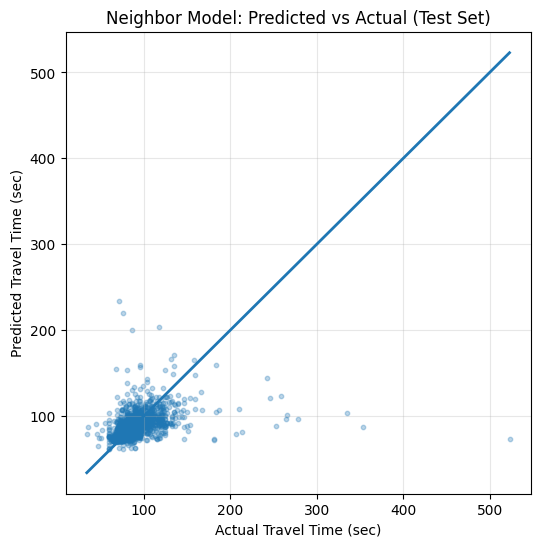

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(test_pred["travel_time_sec"], test_pred["pred_travel_time_sec"], s=10, alpha=0.3)

mn = min(test_pred["travel_time_sec"].min(), test_pred["pred_travel_time_sec"].min())
mx = max(test_pred["travel_time_sec"].max(), test_pred["pred_travel_time_sec"].max())
plt.plot([mn, mx], [mn, mx], linewidth=2)

plt.xlabel("Actual Travel Time (sec)")
plt.ylabel("Predicted Travel Time (sec)")
plt.title("Neighbor Model: Predicted vs Actual (Test Set)")
plt.grid(True, alpha=0.3)
plt.show()

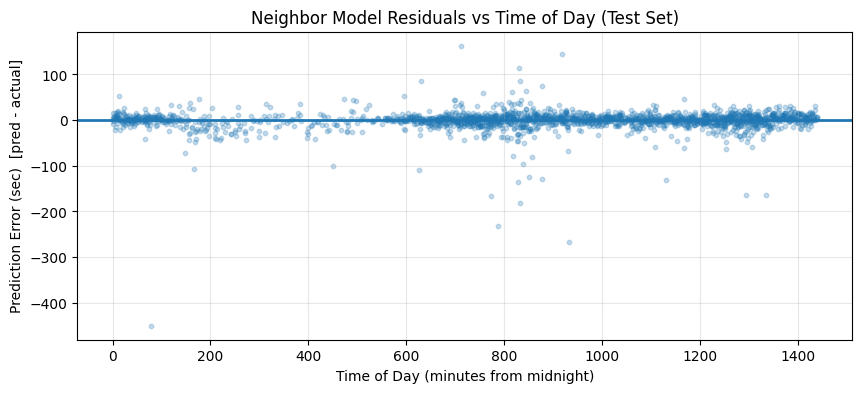

In [ ]:
test_pred["from_depart_dt"] = pd.to_datetime(test_pred["from_depart_time"], unit="s")
test_pred["time_minutes"] = test_pred["from_depart_dt"].dt.hour * 60 + test_pred["from_depart_dt"].dt.minute

plt.figure(figsize=(10,4))
plt.scatter(test_pred["time_minutes"], test_pred["error_sec"], s=10, alpha=0.25)

plt.axhline(0, linewidth=2)
plt.xlabel("Time of Day (minutes from midnight)")
plt.ylabel("Prediction Error (sec)  [pred - actual]")
plt.title("Neighbor Model Residuals vs Time of Day (Test Set)")
plt.grid(True, alpha=0.3)
plt.show()

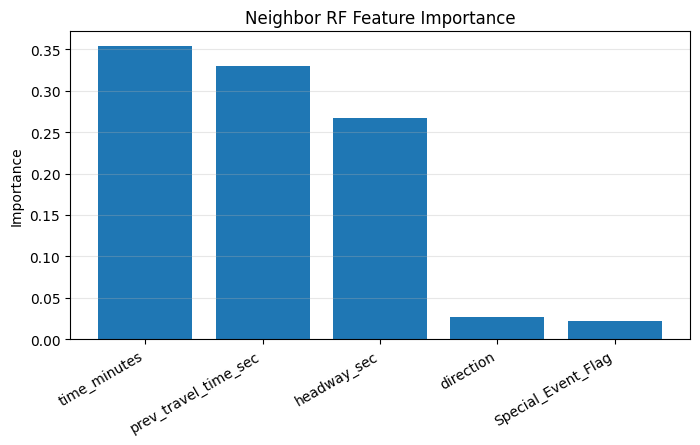

,feature,importance
0,time_minutes,0.353706
3,prev_travel_time_sec,0.329631
4,headway_sec,0.266944
1,direction,0.027551
2,Special_Event_Flag,0.022167


In [ ]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"feature": FEATURES, "importance": importances}).sort_values("importance", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(feat_imp["feature"], feat_imp["importance"])
plt.xticks(rotation=30, ha="right")
plt.ylabel("Importance")
plt.title("Neighbor RF Feature Importance")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

feat_imp

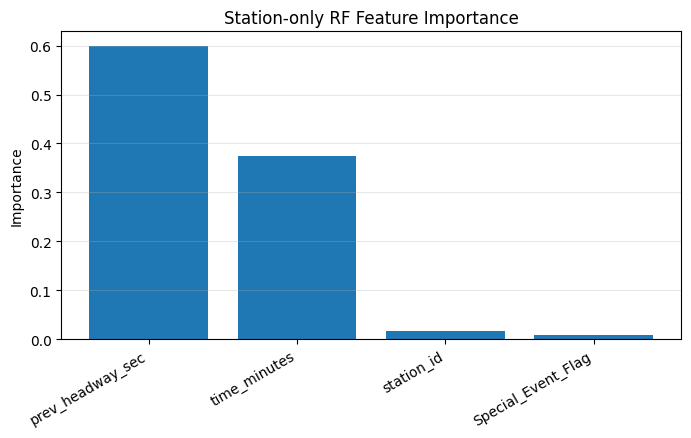

,feature,importance
3,prev_headway_sec,0.598895
0,time_minutes,0.373761
1,station_id,0.017521
2,Special_Event_Flag,0.009824


In [ ]:
importances_s = rf_station.feature_importances_
feat_imp_s = pd.DataFrame({"feature": FEATURES_STATION, "importance": importances_s}).sort_values("importance", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(feat_imp_s["feature"], feat_imp_s["importance"])
plt.xticks(rotation=30, ha="right")
plt.ylabel("Importance")
plt.title("Station-only RF Feature Importance")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

feat_imp_s

In [ ]:
# adjustable thresholds
bins = [-np.inf, 90, 120, 180, np.inf]
labels = ["On-time", "Slight", "Moderate", "Severe"]

In [ ]:
y_test_original = test_df["travel_time_sec"].copy()

# Combine features and target into a temporary DataFrame for consistent NaN handling
temp_test_df = test_df[FEATURES].copy()
temp_test_df["target"] = y_test_original

# Drop rows where any of the relevant features or the target have NaN values
temp_test_df_cleaned = temp_test_df.dropna().copy()

# Reassign X_test and y_test from the cleaned DataFrame
X_test = temp_test_df_cleaned[FEATURES]
y_test = temp_test_df_cleaned["target"]

# Baseline median (median_value is already calculated based on clean y_train)
median_value = train_df["travel_time_sec"].median() # Ensure median is from original train_df if not already calculated
pred_base = np.full(len(y_test), median_value)

# Linear regression
pred_lr = lr.predict(X_test)

# Random forest
pred_rf = rf.predict(X_test)

cm_df = pd.DataFrame({
    "true": y_test.values,
    "baseline": pred_base,
    "linear_regression": pred_lr,
    "random_forest": pred_rf
})

cm_df.head()

,true,baseline,linear_regression,random_forest
0,72.0,82.0,83.746918,75.983444
1,65.0,82.0,83.685941,78.176926
2,72.0,82.0,82.052520,76.517483
3,85.0,82.0,83.733252,79.541122
4,68.0,82.0,87.039525,81.748923


In [ ]:
for col in ["true", "baseline", "linear_regression", "random_forest"]:
    cm_df[col + "_cat"] = pd.cut(cm_df[col], bins=bins, labels=labels)

cm_df[["true_cat", "baseline_cat", "linear_regression_cat", "random_forest_cat"]].head()

,true_cat,baseline_cat,linear_regression_cat,random_forest_cat
0,On-time,On-time,On-time,On-time
1,On-time,On-time,On-time,On-time
2,On-time,On-time,On-time,On-time
3,On-time,On-time,On-time,On-time
4,On-time,On-time,On-time,On-time


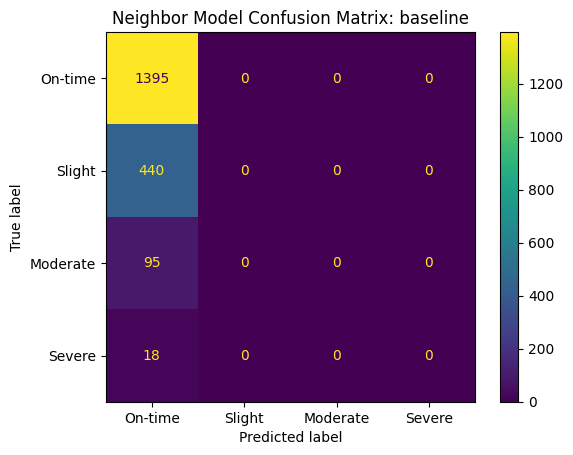

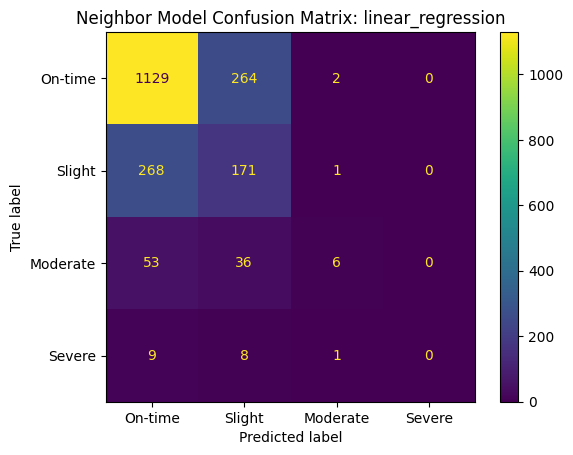

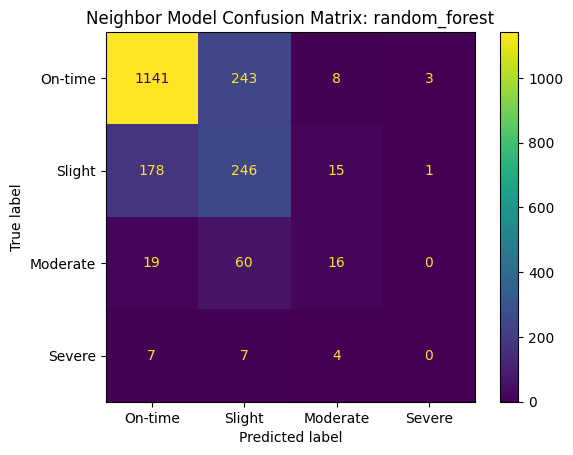

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = ["baseline", "linear_regression", "random_forest"]

for m in models:
    y_true = cm_df["true_cat"]
    y_pred = cm_df[m + "_cat"]

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=None, values_format="d")
    plt.title(f"Neighbor Model Confusion Matrix: {m}")
    plt.show()

In [ ]:
y_test_h = test_station["target_headway_sec"]
y_train_h = train_station["target_headway_sec"]

median_h = y_train_h.median()
pred_base_h = np.full(len(y_test_h), median_h)

pred_rf_h = rf_station.predict(test_station[FEATURES_STATION])

bins_h = [-np.inf, 180, 360, 600, np.inf]
labels_h = ["(<=3m)", "(3-6m)", "(6-10m)", "(>10m)"]

cm_station = pd.DataFrame({
    "true": y_test_h.values,
    "baseline": pred_base_h,
    "random_forest": pred_rf_h
})

for col in ["true", "baseline", "random_forest"]:
    cm_station[col + "_cat"] = pd.cut(cm_station[col], bins=bins_h, labels=labels_h)

cm_station.head()

,true,baseline,random_forest,true_cat,baseline_cat,random_forest_cat
0,290.0,171.0,891.649998,(3-6m),(<=3m),(>10m)
1,429.0,171.0,421.324499,(6-10m),(<=3m),(6-10m)
2,527.0,171.0,404.573513,(6-10m),(<=3m),(6-10m)
3,504.0,171.0,578.873640,(6-10m),(<=3m),(6-10m)
4,108.0,171.0,529.885449,(<=3m),(<=3m),(6-10m)


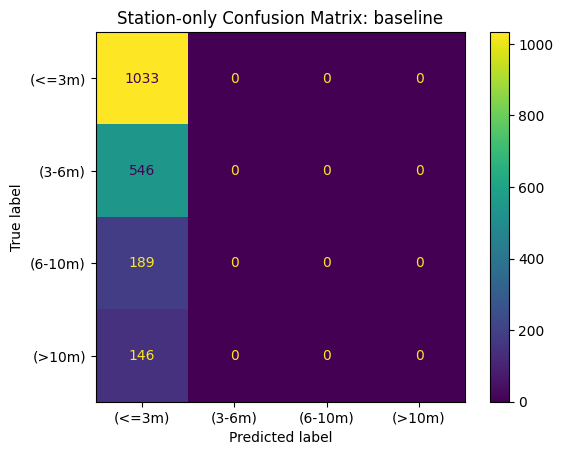

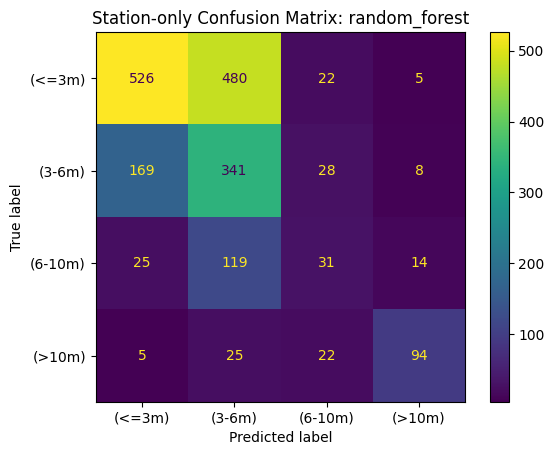

In [ ]:
models_h = ["baseline", "random_forest"]

for m in models_h:
    y_true = cm_station["true_cat"]
    y_pred = cm_station[m + "_cat"]

    cm = confusion_matrix(y_true, y_pred, labels=labels_h)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_h)
    disp.plot(cmap=None, values_format="d")
    plt.title(f"Station-only Confusion Matrix: {m}")
    plt.show()

#Final Metrics

In [ ]:
results_table = pd.DataFrame([
    # Neighbor models
    {
        "Task": "Neighbor arrival prediction",
        "Target": "travel_time_sec",
        "Model": "Baseline (Median)",
        "MAE_sec": 13.237461617195496,
        "RMSE_sec": 24.896983247391244
    },
    {
        "Task": "Neighbor arrival prediction",
        "Target": "travel_time_sec",
        "Model": "Linear Regression",
        "MAE_sec": 12.084038076065994,
        "RMSE_sec": 23.00035774698714
    },
    {
        "Task": "Neighbor arrival prediction",
        "Target": "travel_time_sec",
        "Model": "Random Forest",
        "MAE_sec": 11.218736041239008,
        "RMSE_sec": 22.735811232703146
    },

    # Station-only models
    {
        "Task": "Station-only arrival prediction",
        "Target": "headway_sec",
        "Model": "Baseline (Median)",
        "MAE_sec": 133.27899686520377,
        "RMSE_sec": 259.23959216176956
    },
    {
        "Task": "Station-only arrival prediction",
        "Target": "headway_sec",
        "Model": "Random Forest",
        "MAE_sec": 104.39691188072212,
        "RMSE_sec": 158.67181114546347
    },
])

# minutes for readability
results_table["MAE_min"] = results_table["MAE_sec"] / 60
results_table["RMSE_min"] = results_table["RMSE_sec"] / 60

results_table

,Task,Target,Model,MAE_sec,RMSE_sec,MAE_min,RMSE_min
0,Neighbor arrival prediction,travel_time_sec,Baseline (Median),13.237462,24.896983,0.220624,0.414950
1,Neighbor arrival prediction,travel_time_sec,Linear Regression,12.084038,23.000358,0.201401,0.383339
2,Neighbor arrival prediction,travel_time_sec,Random Forest,11.218736,22.735811,0.186979,0.378930
3,Station-only arrival prediction,headway_sec,Baseline (Median),133.278997,259.239592,2.221317,4.320660
4,Station-only arrival prediction,headway_sec,Random Forest,104.396912,158.671811,1.739949,2.644530


In [ ]:
results_table.to_csv("milestone2A_results_table.csv", index=False)
print("Saved: milestone2A_results_table.csv")

Saved: milestone2A_results_table.csv


In [ ]:
test_pred = test_df.copy()

test_pred["pred_travel_time_sec"] = rf.predict(test_pred[FEATURES])
test_pred["error_sec"] = test_pred["pred_travel_time_sec"] - test_pred["travel_time_sec"]

test_pred.shape, test_pred.head(3)

((1954, 20),
         service_date  Special_Event_Flag            trip_uid from_stop  \
 2676504   2025-04-02                   0  1743567690_4..S13R      418S   
 2676975   2025-04-02                   0  1743568710_4..S01R      418S   
 2677250   2025-04-02                   0  1743569310_4..S01R      418S   
 
         to_stop track  from_depart_time  to_arrival_time  travel_time_sec  \
 2676504    419S     2      1.743586e+09     1.743586e+09             72.0   
 2676975    419S     2      1.743586e+09     1.743586e+09             72.0   
 2677250    419S     2      1.743586e+09     1.743586e+09             65.0   
 
              from_depart_dt       to_arrival_dt  hour  minute  time_minutes  \
 2676504 2025-04-02 09:20:32 2025-04-02 09:21:44     9      20           560   
 2676975 2025-04-02 09:25:22 2025-04-02 09:26:34     9      25           565   
 2677250 2025-04-02 09:32:31 2025-04-02 09:33:36     9      32           572   
 
          direction  prev_travel_time_sec  prev_d

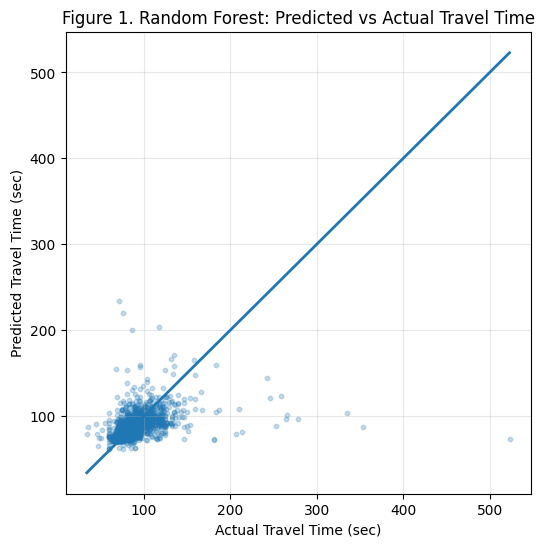

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(test_pred["travel_time_sec"], test_pred["pred_travel_time_sec"], s=10, alpha=0.25)

mn = min(test_pred["travel_time_sec"].min(), test_pred["pred_travel_time_sec"].min())
mx = max(test_pred["travel_time_sec"].max(), test_pred["pred_travel_time_sec"].max())
plt.plot([mn, mx], [mn, mx], linewidth=2)

plt.xlabel("Actual Travel Time (sec)")
plt.ylabel("Predicted Travel Time (sec)")
plt.title("Figure 1. Random Forest: Predicted vs Actual Travel Time")
plt.grid(True, alpha=0.3)
plt.show()

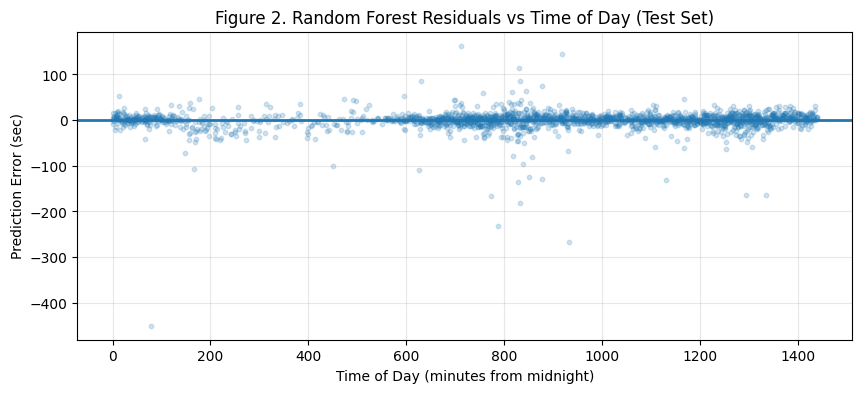

In [ ]:
test_pred["from_depart_dt"] = pd.to_datetime(test_pred["from_depart_time"], unit="s")
test_pred["time_minutes"] = test_pred["from_depart_dt"].dt.hour * 60 + test_pred["from_depart_dt"].dt.minute

plt.figure(figsize=(10,4))
plt.scatter(test_pred["time_minutes"], test_pred["error_sec"], s=10, alpha=0.20)

plt.axhline(0, linewidth=2)
plt.xlabel("Time of Day (minutes from midnight)")
plt.ylabel("Prediction Error (sec)")
plt.title("Figure 2. Random Forest Residuals vs Time of Day (Test Set)")
plt.grid(True, alpha=0.3)
plt.show()

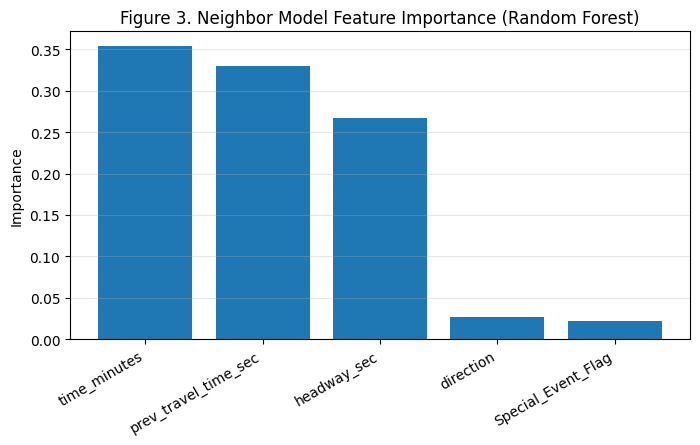

,Feature,Importance
0,time_minutes,0.353706
3,prev_travel_time_sec,0.329631
4,headway_sec,0.266944
1,direction,0.027551
2,Special_Event_Flag,0.022167


In [ ]:
feat_imp = pd.DataFrame({
    "Feature": FEATURES,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(feat_imp["Feature"], feat_imp["Importance"])
plt.xticks(rotation=30, ha="right")
plt.ylabel("Importance")
plt.title("Figure 3. Neighbor Model Feature Importance (Random Forest)")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

feat_imp

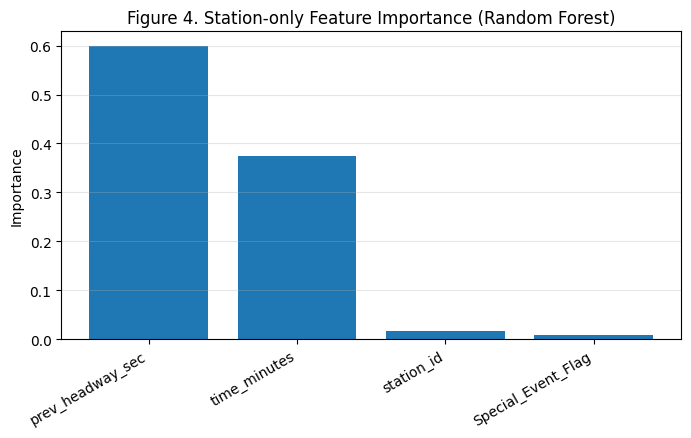

,Feature,Importance
3,prev_headway_sec,0.598895
0,time_minutes,0.373761
1,station_id,0.017521
2,Special_Event_Flag,0.009824


In [ ]:
feat_imp_station = pd.DataFrame({
    "Feature": FEATURES_STATION,
    "Importance": rf_station.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(feat_imp_station["Feature"], feat_imp_station["Importance"])
plt.xticks(rotation=30, ha="right")
plt.ylabel("Importance")
plt.title("Figure 4. Station-only Feature Importance (Random Forest)")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

feat_imp_station

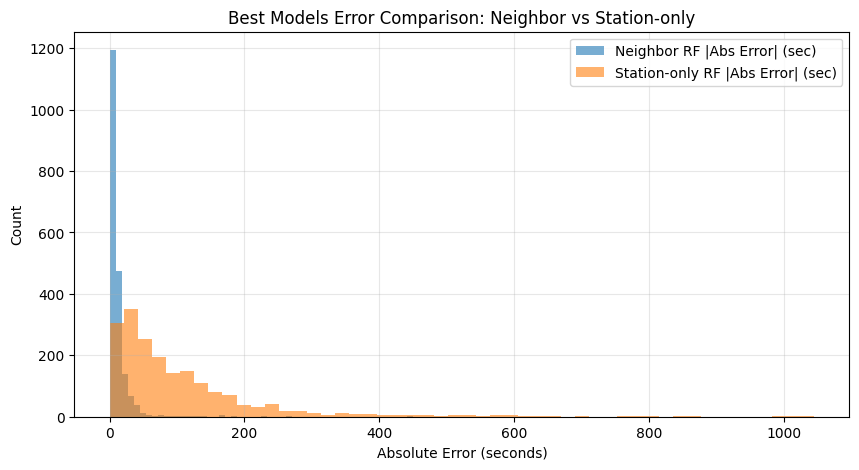

Neighbor RF Abs Error (sec):
count    1954.000000
mean       11.235690
std        19.784154
min         0.000983
25%         3.036448
50%         6.862114
75%        12.840422
max       450.296441
dtype: float64

Station-only RF Abs Error (sec):
count    1914.000000
mean      104.396912
std       119.521932
min         0.233112
25%        31.740675
50%        67.156984
75%       133.558622
max      1045.222929
dtype: float64


In [ ]:
neighbor_test = test_df.copy()
neighbor_test["pred"] = rf.predict(neighbor_test[FEATURES])
neighbor_abs_err = np.abs(neighbor_test["pred"] - neighbor_test["travel_time_sec"])

station_test = test_station.copy()
station_test["pred"] = rf_station.predict(station_test[FEATURES_STATION])
station_abs_err = np.abs(station_test["pred"] - station_test["target_headway_sec"])

plt.figure(figsize=(10,5))
plt.hist(neighbor_abs_err, bins=50, alpha=0.6, label="Neighbor RF |Abs Error| (sec)")
plt.hist(station_abs_err, bins=50, alpha=0.6, label="Station-only RF |Abs Error| (sec)")

plt.xlabel("Absolute Error (seconds)")
plt.ylabel("Count")
plt.title("Best Models Error Comparison: Neighbor vs Station-only")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Neighbor RF Abs Error (sec):")
print(neighbor_abs_err.describe())

print("\nStation-only RF Abs Error (sec):")
print(station_abs_err.describe())

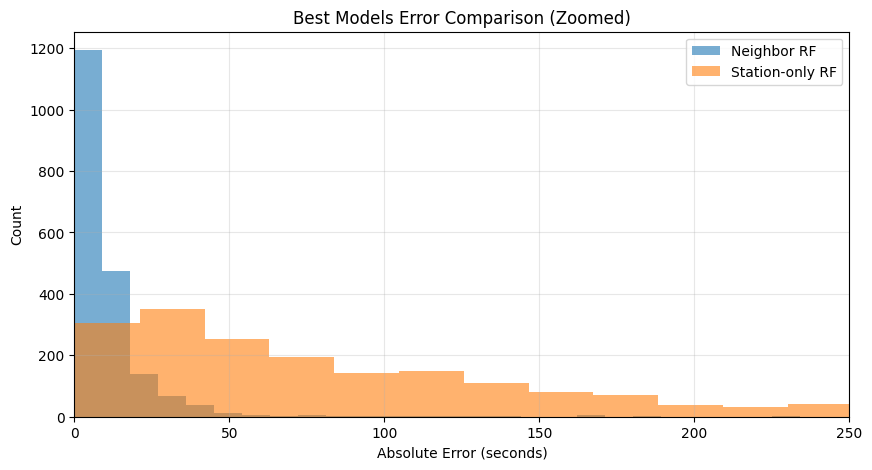

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(neighbor_abs_err, bins=50, alpha=0.6, label="Neighbor RF")
plt.hist(station_abs_err, bins=50, alpha=0.6, label="Station-only RF")

plt.xlim(0, 250)  # show only main region
plt.xlabel("Absolute Error (seconds)")
plt.ylabel("Count")
plt.title("Best Models Error Comparison (Zoomed)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
neighbor_test = test_df.copy()
neighbor_test["pred"] = rf.predict(neighbor_test[FEATURES])
neighbor_test["abs_err"] = np.abs(neighbor_test["pred"] - neighbor_test["travel_time_sec"])

neighbor_test.sort_values("abs_err", ascending=False).head(20)[
    ["service_date", "from_stop", "to_stop", "travel_time_sec", "pred", "abs_err", "Special_Event_Flag"]
]

,service_date,from_stop,to_stop,travel_time_sec,pred,abs_err,Special_Event_Flag
2756939,2025-04-02,419N,418N,523.0,72.703559,450.296441,0
3170198,2025-04-16,418S,419S,354.0,87.567000,266.433000,0
2923062,2025-04-09,418S,419S,335.0,103.060891,231.939109,0
2929910,2025-04-09,418S,419S,278.0,97.056607,180.943393,0
2923102,2025-04-09,418S,419S,264.0,97.092958,166.907042,0
3201853,2025-04-16,419N,418N,253.0,87.948263,165.051737,0
2738841,2025-04-02,418S,419S,266.0,101.467307,164.532693,0
2920585,2025-04-09,419N,418N,71.0,233.779400,162.779400,0
2938306,2025-04-09,418S,419S,76.0,219.574922,143.574922,0
2929353,2025-04-09,418S,419S,259.0,123.166158,135.833842,0


## Figure 1 — Predicted vs Actual (Neighbor Random Forest)

- Most points cluster around **70–120 seconds**, which matches the real travel-time distribution.
- The model tracks **normal travel times** well.
- It struggles more on **extreme delays (200–500 seconds)**, which is expected because these cases are rare.
- Overall, this is a **defendable ML behavior** for a real-time transit dataset.

---

## Figure 2 — Residuals vs Time of Day (Neighbor Random Forest)

- Errors are mostly centered around **0**, meaning predictions are generally unbiased.
- There is a **larger error spread around mid-day (~700–900 minutes)**, consistent with earlier plots showing higher variability during those times.
- Some large negative residuals indicate the model sometimes **underpredicts big delays**, which is expected for rare events.

---

## Figure 3 — Feature Importance (Neighbor Random Forest)

Top 3 drivers:
1. **time_minutes (~0.354)**
2. **prev_travel_time_sec (~0.330)**
3. **headway_sec (~0.267)**

Interpretation (matches transit logic):
- **Time of day matters** (rush hour / service patterns)
- **Delays propagate** (previous travel time influences the next)
- **Headway affects bunching** (larger/smaller gaps change conditions)

---

## Figure 4 — Feature Importance (Station-only Random Forest)

Dominated by:
1. **prev_headway_sec (~0.599)**
2. **time_minutes (~0.374)**

Interpretation:
- Station-only prediction mostly relies on **what happened last time** (previous headway).
- Without upstream information, the model has **limited context**, so accuracy is lower compared to the neighbor-based approach.

---

---

---

#Model B Application on D. Jose Dataset

In [ ]:
drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/datasets/advML/d.jose dataset.csv"
dj = pd.read_csv(PATH)

print(dj.shape)
dj.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(999, 8)


,Date,"Direction (1=Northbound, 2=Southbound)",Observed Arrival Time (minutes since start),Observed Departure Time (minutes since start),"Crowd Level (1=Low, 2=Medium, 3=High)","Service Status (1=Normal, 2=Slowed, 3=Disrupted)","Weather (1=Clear, 2=Rain, 3=Heavy Rain)","Special Event (0=No, 1=Yes)"
0,01/14,1.0,14:40,14:41,2.0,1.0,1.0,0.0
1,01/14,1.0,14:43,14:44,2.0,1.0,1.0,0.0
2,01/14,1.0,14:46,14:47,1.0,1.0,1.0,0.0
3,01/14,1.0,14:50,14:51,3.0,1.0,1.0,0.0
4,01/14,1.0,14:54,14:55,2.0,1.0,1.0,0.0


In [ ]:
dj.columns

Index([' Date', 'Direction (1=Northbound, 2=Southbound)',
       'Observed Arrival Time (minutes since start)',
       'Observed Departure Time (minutes since start)',
       'Crowd Level (1=Low, 2=Medium, 3=High)',
       'Service Status (1=Normal, 2=Slowed, 3=Disrupted)',
       'Weather (1=Clear, 2=Rain, 3=Heavy Rain)',
       'Special Event (0=No, 1=Yes)'],
      dtype='object')

In [ ]:
dj.isna().mean().sort_values(ascending=False)

,0
Date,0.807808
"Direction (1=Northbound, 2=Southbound)",0.807808
Observed Arrival Time (minutes since start),0.807808
Observed Departure Time (minutes since start),0.807808
"Crowd Level (1=Low, 2=Medium, 3=High)",0.807808
"Service Status (1=Normal, 2=Slowed, 3=Disrupted)",0.807808
"Weather (1=Clear, 2=Rain, 3=Heavy Rain)",0.807808
"Special Event (0=No, 1=Yes)",0.807808


In [ ]:
dj_clean = dj.dropna(how="all").copy()

print("Before:", dj.shape)
print("After:", dj_clean.shape)

dj_clean.head()

Before: (999, 8)
After: (192, 8)


,Date,"Direction (1=Northbound, 2=Southbound)",Observed Arrival Time (minutes since start),Observed Departure Time (minutes since start),"Crowd Level (1=Low, 2=Medium, 3=High)","Service Status (1=Normal, 2=Slowed, 3=Disrupted)","Weather (1=Clear, 2=Rain, 3=Heavy Rain)","Special Event (0=No, 1=Yes)"
0,01/14,1.0,14:40,14:41,2.0,1.0,1.0,0.0
1,01/14,1.0,14:43,14:44,2.0,1.0,1.0,0.0
2,01/14,1.0,14:46,14:47,1.0,1.0,1.0,0.0
3,01/14,1.0,14:50,14:51,3.0,1.0,1.0,0.0
4,01/14,1.0,14:54,14:55,2.0,1.0,1.0,0.0


In [ ]:
dj_clean.columns = dj_clean.columns.str.strip()
dj_clean.columns

Index(['Date', 'Direction (1=Northbound, 2=Southbound)',
       'Observed Arrival Time (minutes since start)',
       'Observed Departure Time (minutes since start)',
       'Crowd Level (1=Low, 2=Medium, 3=High)',
       'Service Status (1=Normal, 2=Slowed, 3=Disrupted)',
       'Weather (1=Clear, 2=Rain, 3=Heavy Rain)',
       'Special Event (0=No, 1=Yes)'],
      dtype='object')

In [ ]:
dj = dj_clean.copy()

dj = dj.rename(columns={
    "Direction (1=Northbound, 2=Southbound)": "direction",
    "Observed Arrival Time (minutes since start)": "arr_time",
    "Observed Departure Time (minutes since start)": "dep_time",
    "Crowd Level (1=Low, 2=Medium, 3=High)": "crowd",
    "Service Status (1=Normal, 2=Slowed, 3=Disrupted)": "service_status",
    "Weather (1=Clear, 2=Rain, 3=Heavy Rain)": "weather",
    "Special Event (0=No, 1=Yes)": "special_event"
})

dj.columns

Index(['Date', 'direction', 'arr_time', 'dep_time', 'crowd', 'service_status',
       'weather', 'special_event'],
      dtype='object')

In [ ]:
def hhmm_to_minutes(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if ":" not in x:
        return np.nan
    h, m = x.split(":")
    return int(h) * 60 + int(m)

dj["time_minutes"] = dj["arr_time"].apply(hhmm_to_minutes)

dj[["arr_time", "time_minutes"]].head(10)

,arr_time,time_minutes
0,14:40,880
1,14:43,883
2,14:46,886
3,14:50,890
4,14:54,894
5,14:57,897
6,15:07,907
7,15:11,911
8,15:13,913
9,15:16,916


In [ ]:
dj = dj.sort_values(["Date", "direction", "time_minutes"]).copy()
dj.head(10)

,Date,direction,arr_time,dep_time,crowd,service_status,weather,special_event,time_minutes
0,01/14,1.0,14:40,14:41,2.0,1.0,1.0,0.0,880
1,01/14,1.0,14:43,14:44,2.0,1.0,1.0,0.0,883
2,01/14,1.0,14:46,14:47,1.0,1.0,1.0,0.0,886
3,01/14,1.0,14:50,14:51,3.0,1.0,1.0,0.0,890
4,01/14,1.0,14:54,14:55,2.0,1.0,1.0,0.0,894
5,01/14,1.0,14:57,14:58,1.0,1.0,1.0,0.0,897
6,01/14,1.0,15:07,15:08,1.0,1.0,1.0,0.0,907
7,01/14,1.0,15:11,15:12,3.0,1.0,1.0,0.0,911
8,01/14,1.0,15:13,15:14,2.0,1.0,1.0,0.0,913
9,01/14,1.0,15:16,15:17,2.0,1.0,1.0,0.0,916


In [ ]:
dj["prev_time_minutes"] = dj.groupby(["Date", "direction"])["time_minutes"].shift(1)
dj["headway_min"] = dj["time_minutes"] - dj["prev_time_minutes"]
dj["headway_sec"] = dj["headway_min"] * 60

dj[["Date", "direction", "arr_time", "time_minutes", "headway_min"]].head(15)

,Date,direction,arr_time,time_minutes,headway_min
0,01/14,1.0,14:40,880,NaN
1,01/14,1.0,14:43,883,3.0
2,01/14,1.0,14:46,886,3.0
3,01/14,1.0,14:50,890,4.0
4,01/14,1.0,14:54,894,4.0
5,01/14,1.0,14:57,897,3.0
6,01/14,1.0,15:07,907,10.0
7,01/14,1.0,15:11,911,4.0
8,01/14,1.0,15:13,913,2.0
9,01/14,1.0,15:16,916,3.0


In [ ]:
dj["prev_headway_min"] = dj.groupby(["Date", "direction"])["headway_min"].shift(1)
dj["prev_headway_sec"] = dj["prev_headway_min"] * 60

In [ ]:
dj_ml = dj.dropna(subset=["headway_sec", "prev_headway_sec"]).copy()

print("dj_ml shape:", dj_ml.shape)
dj_ml.head(10)

dj_ml shape: (176, 14)


,Date,direction,arr_time,dep_time,crowd,service_status,weather,special_event,time_minutes,prev_time_minutes,headway_min,headway_sec,prev_headway_min,prev_headway_sec
2,01/14,1.0,14:46,14:47,1.0,1.0,1.0,0.0,886,883.0,3.0,180.0,3.0,180.0
3,01/14,1.0,14:50,14:51,3.0,1.0,1.0,0.0,890,886.0,4.0,240.0,3.0,180.0
4,01/14,1.0,14:54,14:55,2.0,1.0,1.0,0.0,894,890.0,4.0,240.0,4.0,240.0
5,01/14,1.0,14:57,14:58,1.0,1.0,1.0,0.0,897,894.0,3.0,180.0,4.0,240.0
6,01/14,1.0,15:07,15:08,1.0,1.0,1.0,0.0,907,897.0,10.0,600.0,3.0,180.0
7,01/14,1.0,15:11,15:12,3.0,1.0,1.0,0.0,911,907.0,4.0,240.0,10.0,600.0
8,01/14,1.0,15:13,15:14,2.0,1.0,1.0,0.0,913,911.0,2.0,120.0,4.0,240.0
9,01/14,1.0,15:16,15:17,2.0,1.0,1.0,0.0,916,913.0,3.0,180.0,2.0,120.0
20,01/14,1.0,15:27,15:28,3.0,1.0,1.0,0.0,927,916.0,11.0,660.0,3.0,180.0
21,01/14,1.0,15:31,15:32,3.0,1.0,1.0,0.0,931,927.0,4.0,240.0,11.0,660.0


In [ ]:
dj_ml = dj_ml.sort_values(["Date", "direction", "time_minutes"]).copy()

split_index = int(len(dj_ml) * 0.8)

train_dj = dj_ml.iloc[:split_index].copy()
test_dj  = dj_ml.iloc[split_index:].copy()

print("Train:", train_dj.shape)
print("Test:", test_dj.shape)

Train: (140, 14)
Test: (36, 14)


In [ ]:
FEATURES_DJ = [
    "time_minutes",
    "direction",
    "crowd",
    "service_status",
    "weather",
    "special_event",
    "prev_headway_sec"
]

TARGET_DJ = "headway_sec"

X_train = train_dj[FEATURES_DJ]
y_train = train_dj[TARGET_DJ]

X_test = test_dj[FEATURES_DJ]
y_test = test_dj[TARGET_DJ]

# Baseline
median_pred = np.full(len(y_test), y_train.median())
mae_base = mean_absolute_error(y_test, median_pred)
rmse_base = np.sqrt(mean_squared_error(y_test, median_pred))

# RF
rf_dj = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10
)
rf_dj.fit(X_train, y_train)
pred_rf = rf_dj.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))

print("D. Jose Median Baseline MAE (sec):", mae_base)
print("D. Jose Median Baseline RMSE (sec):", rmse_base)

print("D. Jose Random Forest MAE (sec):", mae_rf)
print("D. Jose Random Forest RMSE (sec):", rmse_rf)

D. Jose Median Baseline MAE (sec): 73.33333333333333
D. Jose Median Baseline RMSE (sec): 120.83045973594572
D. Jose Random Forest MAE (sec): 99.99073529223233
D. Jose Random Forest RMSE (sec): 124.0622347868437


In [ ]:
dj_ml["Date"].value_counts()

,count
Date,
Jan-28,48
02/04,45
01/14,42
01/21,41


In [ ]:
from sklearn.linear_model import LinearRegression

lr_dj = LinearRegression()
lr_dj.fit(X_train, y_train)
pred_lr = lr_dj.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))

print("D. Jose Linear Regression MAE (sec):", mae_lr)
print("D. Jose Linear Regression RMSE (sec):", rmse_lr)

D. Jose Linear Regression MAE (sec): 94.7443466374681
D. Jose Linear Regression RMSE (sec): 120.17647002884017


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

FEATURES_DJ = [
    "time_minutes",
    "direction",
    "crowd",
    "service_status",
    "weather",
    "special_event",
    "prev_headway_sec"
]
TARGET_DJ = "headway_sec"

dates = sorted(dj_ml["Date"].unique())

rows = []

for test_date in dates:
    train_part = dj_ml[dj_ml["Date"] != test_date].copy()
    test_part  = dj_ml[dj_ml["Date"] == test_date].copy()

    X_train = train_part[FEATURES_DJ]
    y_train = train_part[TARGET_DJ]
    X_test  = test_part[FEATURES_DJ]
    y_test  = test_part[TARGET_DJ]

    # Baseline
    baseline_pred = np.full(len(y_test), y_train.median())
    mae_base = mean_absolute_error(y_test, baseline_pred)
    rmse_base = np.sqrt(mean_squared_error(y_test, baseline_pred))

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred_lr = lr.predict(X_test)
    mae_lr = mean_absolute_error(y_test, pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))

    # Random Forest
    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=10
    )
    rf.fit(X_train, y_train)
    pred_rf = rf.predict(X_test)
    mae_rf = mean_absolute_error(y_test, pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))

    rows.append({
        "Test_Date": test_date,
        "Baseline_MAE": mae_base,
        "LR_MAE": mae_lr,
        "RF_MAE": mae_rf,
        "Baseline_RMSE": rmse_base,
        "LR_RMSE": rmse_lr,
        "RF_RMSE": rmse_rf,
        "Test_Rows": len(test_part)
    })

dj_results = pd.DataFrame(rows)
dj_results

,Test_Date,Baseline_MAE,LR_MAE,RF_MAE,Baseline_RMSE,LR_RMSE,RF_RMSE,Test_Rows
0,01/14,115.714286,105.419186,84.860005,184.932420,166.893630,133.555120,42
1,01/21,112.682927,103.690941,82.029120,182.903413,163.569417,152.057037,41
2,02/04,104.000000,87.322500,121.793472,136.235091,111.456268,157.749363,45
3,Jan-28,105.000000,99.154471,113.681599,144.913767,136.656328,147.778822,48


In [ ]:
avg = dj_results[[
    "Baseline_MAE", "LR_MAE", "RF_MAE",
    "Baseline_RMSE", "LR_RMSE", "RF_RMSE"
]].mean()

avg

,0
Baseline_MAE,109.349303
LR_MAE,98.896774
RF_MAE,100.591049
Baseline_RMSE,162.246173
LR_RMSE,144.643911
RF_RMSE,147.785085


## Doroteo Jose (Station-only Model) Final Result — Leave-One-Day-Out

**Average across all 4 days:**

### Baseline (Median)
- **MAE ≈ 109.35 sec**
- **RMSE ≈ 162.25 sec**

### Linear Regression (Best Overall)
- **MAE ≈ 98.90 sec**
- **RMSE ≈ 144.64 sec**

### Random Forest
- **MAE ≈ 100.59 sec**
- **RMSE ≈ 147.79 sec**